<a href="https://colab.research.google.com/github/vineet1947/Creating-a-FeedForward-Network-from-Scratch-/blob/master/sigmoid__neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Functions  


In [ ]:
import numpy  as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import accuracy_score , mean_squared_error
from tqdm import tqdm_notebook


$S_{w,b}(x) = \frac{1}{1  + e^{-(wx + b)}}$







In [ ]:
def sigmoid(x , w, b ):
  return 1/(1 + np.exp(- (w*x + b)))
  

In [ ]:
sigmoid(1 , .5 , 0 )

0.6224593312018546

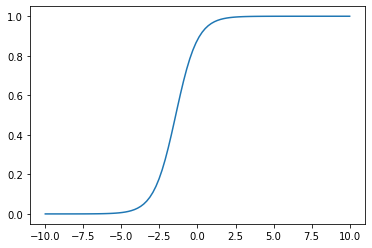

In [ ]:
w =  1   #@param {type: "slider", min: -2, max: 2 ,step  : 0.1 }
b=  2    #@param {type: "slider", min: -2, max: 2 ,step  : 0.1 }

X = np.linspace(-10, 10  ,100  )
Y = sigmoid( X , w , b )

plt.plot(X ,Y )
plt.show() 

In [ ]:
def sigmoid_2d(x1 , x2 , w1  ,w2  , b):
  return 1/(1 + np.exp(-(x1*w1 + x2*w2 +  b) ))


In [ ]:
sigmoid_2d(1 , 0 , .5 ,  0 , 0 )

0.6224593312018546

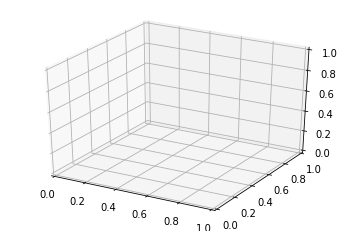

In [ ]:
from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
 


In [ ]:
X1=  np.linspace(-10 , 10  ,100)
X2=  np.linspace(-10 , 10  ,100)

XX1 ,XX2 =  np.meshgrid(X1  , X2 )

print(X1.shape ,X2.shape , XX1.shape , XX2.shape   )



(100,) (100,) (100, 100) (100, 100)


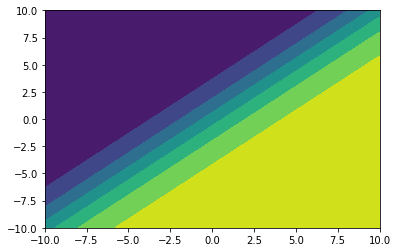

In [ ]:

w1 = 0.5
w2 =  -0.5
b = 0.1
Y = sigmoid_2d(XX1 , XX2 , w1  ,w2 , b )
#this is the line of crossing 

plt.contourf(XX1 ,XX2  ,Y )
plt.show()


Text(0.5, 0, 'y')

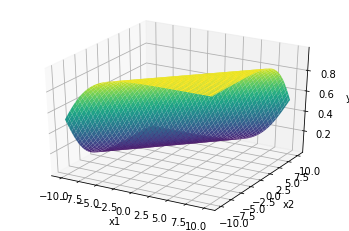

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2 , Y ,  cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y') 





# Compute the Loss for  a Given Dataset


In [ ]:
w_unknown  = 0.5
b_unknown =  0.25

X = np.random.random(25) *20 - 10 
Y = sigmoid(X ,w_unknown ,  b_unknown )




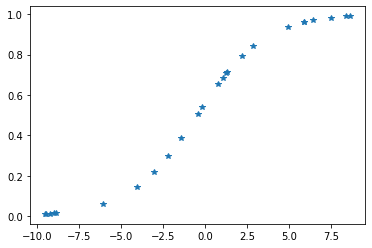

In [ ]:
plt.plot(X ,Y , '*')
plt.show()

In [ ]:
def calculate_loss(X , Y , w_est , b_est):
  loss =  0
  for x , y in zip(X ,Y):
    loss += (y - sigmoid(x ,w_est , b_est  ))**2
  return loss


In [ ]:
W = np.linspace(0 , 2 ,101)
B = np.linspace(-1 ,1  ,101 )

WW  ,BB  = np.meshgrid(W   , B)

Loss = np.zeros(WW.shape)



In [ ]:
for  i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X , Y , WW[i ,j] , BB[i,j])
    


  


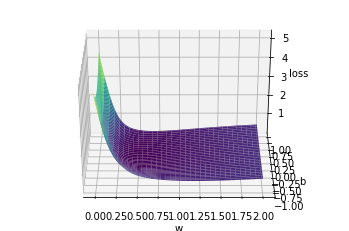

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB , Loss ,  cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')


ax.view_init(30 , 270)


In [ ]:
ij = np.argmin(Loss)
i  = int(np.floor(ij/Loss.shape[1]))
j   = int(ij - i*Loss.shape[1])
              

In [ ]:
print(i , j)
 

63 25


In [ ]:
print(WW[i, j] , BB[i,j])


0.5 0.26


#Class For Sigmoid Neuron 


In [ ]:
class SigmoidNeuron:

  def __init__(self):
    self.w= None 
    self.b = None 

  def perceptron(self,x):
    return np.dot(x , self.w.T) + self.b

  def sigmoid(self , x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self , x , y ):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred  - y )*y_pred* (1- y_pred )*x 

  def grad_b(self , x , y ):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred  - y )*y_pred* (1- y_pred ) 

  def fit(self  , X ,Y  ,epochs = 1  , learning_rate = 1 , initialise = True  , display_loss = False):

    # initilaised  w ,b
    if initialise:
      self.w=  np.random.randn(1 ,X.shape[1])
      self.b=  0

    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs) , total = epochs , unit = "epochs"):
      dw= 0
      db = 0
      for x,y in zip(X , Y):
        dw += self.grad_w(x,  y)
        db+= self.grad_b(x ,y)
      self.w -= learning_rate*dw
      self.b -= learning_rate*db
      

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred  ,Y)

    if display_loss:
      lists = loss.items()
      x,y = zip(*lists)
      plt.plot(x, y)
      plt.xlabel('Epochs')
      plt.ylabel('Mean square Error')
      plt.show()




    
  def predict(self, X):
      Y_pred = []
      for x in X :
        y_pred = self.sigmoid(self.perceptron(x))
        Y_pred.append(y_pred)
      return np.array(Y_pred)




  

#Fit  For Toy Data 

In [ ]:
X = np.asarray([[2.5,  2.5] , [4  ,-1] , [1, -4]  ,  [-3 , 1.25]  , [-2, -4]  , [1  , 5]])
Y = [1  , 1 , 1,  0 , 0 , 0]



In [ ]:
sn  = SigmoidNeuron()
sn.fit(X , Y  , 1,  0.25 ,  True )


In [ ]:
def plot_sn(X , Y  , sn  ,ax):
  X1 = np.linspace(-10  , 10 , 100)
  X2 = np.linspace(-10  , 10  ,100 )
  XX1  , XX2 = np.meshgrid(X1 , X2 )
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j] , X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf( XX1  ,XX2 , YY )
  ax.scatter(X[:,0] , X[:,1] , c = Y )
  ax.plot()
  




[[-0.46122555  0.90376744]] [0.02849512]
[[-0.19813327  0.82816739]] [0.04504023]
[[0.24179479 0.63242367]] [0.06342122]
[[0.67178266 0.28629271]] [0.07391112]
[[ 0.76303836 -0.20515026]] [0.09522206]
[[ 0.84229736 -0.34030868]] [0.02007119]
[[ 0.96991792 -0.26404798]] [-0.04160683]
[[ 1.01228443 -0.39347661]] [-0.10333126]
[[ 1.1131508  -0.32205651]] [-0.15300139]
[[ 1.14748134 -0.41665362]] [-0.20302225]
[[ 1.22027441 -0.38042527]] [-0.24393361]
[[ 1.2573898  -0.42922324]] [-0.28386017]
[[ 1.30807257 -0.42575299]] [-0.31845557]
[[ 1.34612522 -0.44689241]] [-0.35110312]
[[ 1.38503584 -0.45606035]] [-0.3807964]
[[ 1.41993859 -0.46831745]] [-0.4084475]
[[ 1.45295129 -0.47869557]] [-0.43411336]
[[ 1.48384361 -0.48868394]] [-0.45807424]
[[ 1.51294888 -0.49804689]] [-0.4805058]
[[ 1.54043881 -0.50689654]] [-0.50157193]
[[ 1.56647769 -0.51527918]] [-0.52141153]
[[ 1.59120491 -0.52324015]] [-0.54014499]
[[ 1.61474129 -0.53081836]] [-0.55787695]
[[ 1.63719212 -0.53804769]] [-0.57469877]
[[ 1.

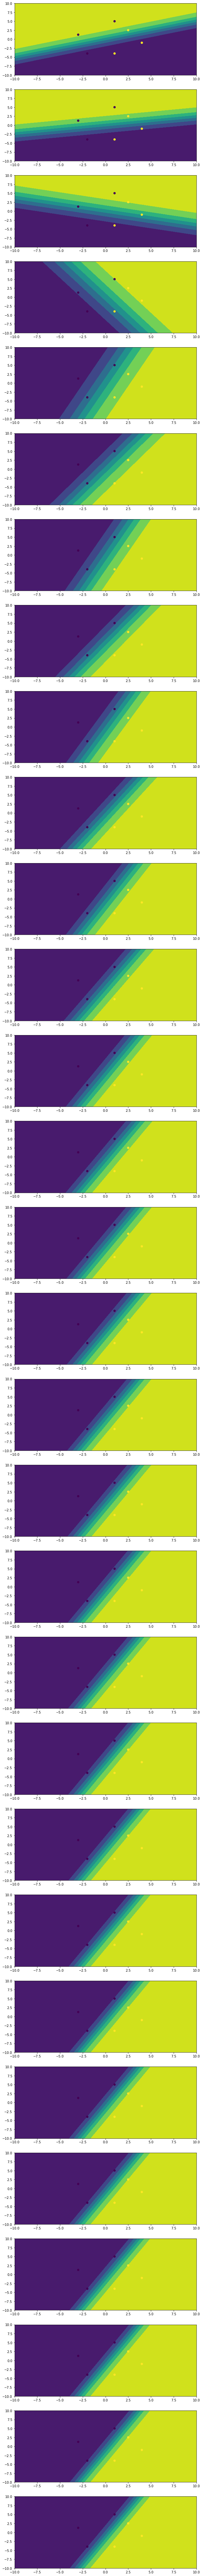

In [ ]:

sn.fit(X , Y  , 1,  0.5 , True )
N  = 30 
plt.figure(figsize  = (10  ,N*5 )) 
for  i in range (N):
  print(sn.w  ,sn.b )
  ax  = plt.subplot(N + 1  ,  1  , i +1  )
  plot_sn(X , Y ,sn , ax )
  sn.fit(X , Y , 1 , 0.5 , False )



# Load Data 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mobile_cleaned.csv to mobile_cleaned (1).csv


In [ ]:
!ls

'mobile_cleaned (1).csv'   mobile_cleaned.csv   sample_data


In [ ]:
data  =pd.read_csv('mobile_cleaned.csv')

In [ ]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [ ]:
data.shape

(341, 88)

In [ ]:
X = data.drop('Rating' , axis = 1 )


In [ ]:
Y = data['Rating'].values 

In [ ]:
Y 


In [ ]:
threshold = 4.2

data['Class'] = (data['Rating'] >= threshold ).astype(np.int)



In [ ]:
data['Class'].value_counts(normalize = True )

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [ ]:
Y_binarised  =data['Class'].values 

#Standarization 


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
R = np.random.random([100  ,1 ])


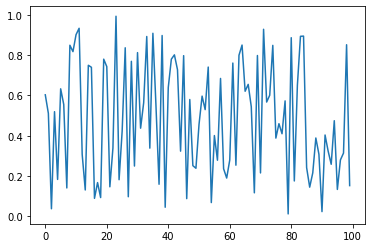

In [ ]:
plt.plot(R )
plt.show()

In [ ]:
np.mean(R)

0.4825073024128379

In [ ]:
np.std(R)


0.28211133359297114

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(R)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.mean_


array([0.4825073])

In [ ]:
RT = scaler.transform(R) #standarized here !!

In [ ]:
np.mean(RT)

3.552713678800501e-17

In [ ]:
np.std(RT)

0.9999999999999999

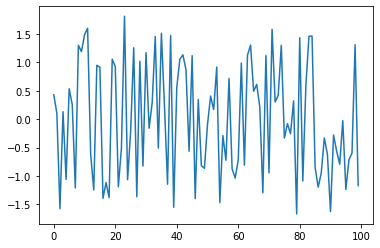

In [ ]:
plt.plot(RT)
plt.show()

In [ ]:
X_train   ,X_test  ,Y_train  , Y_test    = train_test_split(X , Y  , random_state  =  0  , stratify = Y_binarised)

In [ ]:
print( X_train.shape  , X_test.shape)


(255, 87) (86, 87)


In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test) 


In [ ]:
minmax_scaler = MinMaxScaler()


In [ ]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1 , 1))

In [ ]:
Y_scaled_test  = minmax_scaler.transform(Y_test.reshape(-1 , 1))


In [ ]:
scaled_thershold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1  ,1)))[0][0]

In [ ]:
scaled_thershold 

0.6363636363636365

In [ ]:
Y_binarised_train   = (Y_scaled_train.T >  scaled_thershold ).astype("int").ravel() #86 scaled , binarised = 255

In [ ]:
Y_binarised_test =  (Y_scaled_test.T >  scaled_thershold ).astype("int").ravel() #255 scaled , 

#Real Data  Training  



In [ ]:
sn = SigmoidNeuron() 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


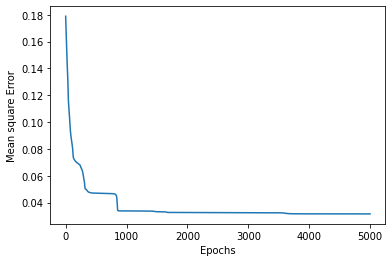

In [ ]:
sn.fit(X_scaled_train , Y_scaled_train , epochs = 5000 , learning_rate  = 0.015 , display_loss= True)


In [ ]:
Y_pred_train =sn.predict(X_scaled_train) 

Y_pred_test = sn.predict(X_scaled_test) 



In [ ]:
Y_pred_binarised_train = (Y_pred_train>  scaled_thershold ).astype("int").ravel() 
Y_pred_binarised_test = (Y_pred_test >  scaled_thershold ).astype("int").ravel() 

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarised_train  , Y_binarised_train) 
accuracy_test = accuracy_score(Y_pred_binarised_test ,  Y_binarised_test) 


In [ ]:
print(accuracy_train  ,accuracy_test)


0.7254901960784313 0.7209302325581395
